<a href="https://colab.research.google.com/github/AndreuUtkin/ML_notebooks/blob/main/obde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from google.colab import files
import zipfile
import os
# Распакуйте архив
with zipfile.ZipFile('Salad.zip', 'r') as zip_ref:
    zip_ref.extractall('salad_dataset')

In [ ]:
import os
import random
import cv2
from google.colab.patches import cv2_imshow

# Пути к данным
dataset_path = "/content/salad_dataset"
train_images_path = os.path.join(dataset_path, "train/images")

# Проверка содержимого папки
print("Файлы в train:", os.listdir(train_images_path))

# Выбор случайного изображения (поддержка .jpg, .png)
all_images = [img for img in os.listdir(train_images_path)
             if img.lower().endswith((".jpg", ".png", ".jpeg"))]

if not all_images:
    raise ValueError("Нет изображений в папке train!")

random_image = random.choice(all_images)
image_path = os.path.join(train_images_path, random_image)
print("Выбрано изображение:", image_path)

# Загрузка изображения и аннотаций (аналогично предыдущим примерам)
# ...

Файлы в train: ['det_375_jpg.rf.95909775544c6807c30af26a6c88db3b.jpg', 'det_340_jpg.rf.f49c67085b9d82798bc4984fde10aa50.jpg', 'det_12_jpg.rf.11657c53cd7b054180d287b335f6ca41.jpg', 'det_301_jpg.rf.23ec2fe3d524c626c2ce64f4e12baaeb.jpg', 'det_836_jpg.rf.41842cdffd3f62be060d4755bf72e916.jpg', 'det_621_jpg.rf.82ded39d46102614b3658c2e1daeaae4.jpg', 'det_374_jpg.rf.878804afaec228ef59885b91807ff2e2.jpg', 'det_103_jpg.rf.cdd4706a25cca0459c7068129cd03a08.jpg', 'det_520_jpg.rf.a82d7121f6b06f05e620cfef99d64815.jpg', 'det_36_jpg.rf.84d64d5ab8a8ee4b765fc4a09a0397ca.jpg', 'det_28_jpg.rf.531eadb286f404e79c5ad7015cebc4ee.jpg', 'det_705_jpg.rf.28af65c3992c8097c9b9a71e049b7bf2.jpg', 'det_223_jpg.rf.478b74d40200695912ba510b813ffdcd.jpg', 'det_367_jpg.rf.d72cf11ad3c6180d660865f058ebec64.jpg', 'det_79_jpg.rf.8d8700f0364276b71cc26ea2760eef97.jpg', 'det_144_jpg.rf.7fa9dd1d7698be25440676a6ea457df0.jpg', 'det_358_jpg.rf.22782d01b668314117e7c864e867fbbc.jpg', 'det_350_jpg.rf.7c4286de5adb8f0efc06e16d6b0d6883.jpg'

In [ ]:
import json
import cv2

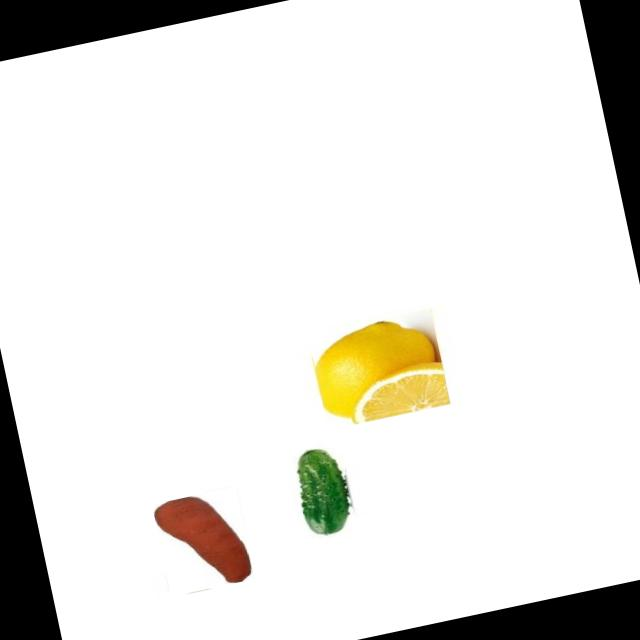

Размер изображения: 640x640


In [ ]:
# Загрузка изображения
image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Не удалось загрузить изображение {image_path}")

# Определяем тип аннотаций (COCO или YOLO)
is_coco = os.path.exists(os.path.join(dataset_path, "annotations"))
is_yolo = any(img.replace(".jpg", ".txt") in os.listdir(train_images_path) for img in all_images)

# Обработка COCO формата
if is_coco:
    annotations_path = os.path.join(dataset_path, "annotations/instances_train.json")
    try:
        with open(annotations_path) as f:
            coco_data = json.load(f)

        # Находим ID выбранного изображения
        image_id = next((img["id"] for img in coco_data["images"] if img["file_name"] == random_image), None)

        if image_id is not None:
            # Находим все аннотации для этого изображения
            annotations = [ann for ann in coco_data["annotations"] if ann["image_id"] == image_id]

            # Рисуем bounding boxes
            for ann in annotations:
                x, y, w, h = map(int, ann["bbox"])
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
                if "category_id" in ann:
                    class_name = str(ann["category_id"])
                    cv2.putText(image, class_name, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            print(f"Найдено {len(annotations)} объектов (COCO формат)")
    except Exception as e:
        print(f"Ошибка при чтении COCO аннотаций: {e}")

# Обработка YOLO формата
elif is_yolo:
    txt_path = os.path.join(train_images_path, random_image.replace(".jpg", ".txt").replace(".png", ".txt"))
    if os.path.exists(txt_path):
        with open(txt_path, "r") as f:
            lines = f.readlines()

        h, w = image.shape[:2]

        for line in lines:
            parts = line.strip().split()
            if len(parts) >= 5:
                class_id, x_center, y_center, width, height = map(float, parts[:5])

                # Конвертация из YOLO в абсолютные координаты
                x1 = int((x_center - width/2) * w)
                y1 = int((y_center - height/2) * h)
                x2 = int((x_center + width/2) * w)
                y2 = int((y_center + height/2) * h)

                cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(image, str(int(class_id)), (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        print(f"Найдено {len(lines)} объектов (YOLO формат)")

# Отображение результата
cv2_imshow(image)
print(f"Размер изображения: {image.shape[1]}x{image.shape[0]}")

In [ ]:
from ultralytics import YOLO

# Загрузите модель (yolov8n.pt, yolov8s.pt, ...)
model = YOLO('yolov8s.pt')

# Обучите модель
results = model.train(
    data='salad_dataset/data.yaml',
    epochs=60,
    imgsz=640,
    batch=16,
    device='0'  # GPU
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 200MB/s]


Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=salad_dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, p

100%|██████████| 755k/755k [00:00<00:00, 20.7MB/s]

Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

 22        [15, 18, 21]  1   2119918  ultralytics.nn.modules.head.Detect           [10, [128, 256, 512]]         
Model summary: 129 layers, 11,139,470 parameters, 11,139,454 gradients, 28.7 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 90.9MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 376.4±232.9 MB/s, size: 18.5 KB)


train: Scanning /content/salad_dataset/train/labels... 3978 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3978/3978 [00:01<00:00, 2318.11it/s]


train: New cache created: /content/salad_dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 357.4±211.8 MB/s, size: 15.5 KB)


val: Scanning /content/salad_dataset/valid/labels... 358 images, 0 backgrounds, 0 corrupt: 100%|██████████| 358/358 [00:00<00:00, 1355.27it/s]

val: New cache created: /content/salad_dataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60      3.71G      1.106      1.509      1.172         74        640: 100%|██████████| 249/249 [01:18<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.36it/s]


                   all        358       1814      0.944      0.904      0.954      0.762

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60       4.5G     0.9677     0.8126      1.128         83        640: 100%|██████████| 249/249 [01:13<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.90it/s]

                   all        358       1814      0.954      0.925      0.961      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60      4.53G      0.926     0.7451       1.11         80        640: 100%|██████████| 249/249 [01:13<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.04it/s]

                   all        358       1814      0.947      0.928      0.965      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60      4.57G     0.9032      0.719      1.106         63        640: 100%|██████████| 249/249 [01:13<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.07it/s]

                   all        358       1814      0.955      0.934       0.97      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60      4.61G      0.877     0.6602      1.094         67        640: 100%|██████████| 249/249 [01:12<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.18it/s]

                   all        358       1814      0.964      0.939      0.976       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60      4.65G      0.837      0.636      1.076         82        640: 100%|██████████| 249/249 [01:12<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.01it/s]

                   all        358       1814      0.963      0.931      0.971      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60      4.68G     0.8163     0.6065      1.063         80        640: 100%|██████████| 249/249 [01:12<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.94it/s]

                   all        358       1814      0.968      0.934      0.978      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60      4.72G     0.7939     0.5808      1.052         90        640: 100%|██████████| 249/249 [01:12<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.97it/s]

                   all        358       1814      0.961      0.955      0.976      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60      4.76G     0.7613     0.5595      1.038         68        640: 100%|██████████| 249/249 [01:12<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.94it/s]

                   all        358       1814      0.978      0.959      0.982      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60      4.79G     0.7549     0.5553      1.036         75        640: 100%|██████████| 249/249 [01:12<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.00it/s]

                   all        358       1814      0.967      0.945      0.977      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60      4.82G     0.7411     0.5339      1.027         94        640: 100%|██████████| 249/249 [01:12<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.98it/s]

                   all        358       1814      0.988       0.95      0.982      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60      4.86G     0.7323     0.5291      1.022         66        640: 100%|██████████| 249/249 [01:12<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.01it/s]

                   all        358       1814      0.986      0.955       0.98      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60       4.9G     0.7114     0.5038      1.012         62        640: 100%|██████████| 249/249 [01:12<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.09it/s]

                   all        358       1814      0.977      0.941      0.977       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60      4.94G     0.7029     0.4944      1.012         79        640: 100%|██████████| 249/249 [01:12<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.34it/s]

                   all        358       1814      0.979      0.955      0.982      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60      4.97G     0.6853      0.477      1.001         61        640: 100%|██████████| 249/249 [01:13<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.60it/s]

                   all        358       1814      0.983       0.96      0.984      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60      5.01G     0.6851     0.4803          1         70        640: 100%|██████████| 249/249 [01:13<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.59it/s]

                   all        358       1814      0.967      0.968      0.983      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60      5.05G     0.6736     0.4676     0.9959         81        640: 100%|██████████| 249/249 [01:13<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.63it/s]

                   all        358       1814      0.985      0.959      0.984      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60      5.08G     0.6613      0.458     0.9921         53        640: 100%|██████████| 249/249 [01:12<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.64it/s]

                   all        358       1814      0.984      0.954      0.984      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60      5.12G     0.6554     0.4517     0.9848         76        640: 100%|██████████| 249/249 [01:12<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.63it/s]

                   all        358       1814      0.989      0.954      0.983      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60      5.15G     0.6486     0.4495     0.9798         81        640: 100%|██████████| 249/249 [01:13<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.62it/s]

                   all        358       1814      0.979      0.959       0.98      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60      5.19G     0.6375     0.4366     0.9804         97        640: 100%|██████████| 249/249 [01:13<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.64it/s]

                   all        358       1814      0.988      0.954      0.983      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60      5.23G     0.6296     0.4335     0.9762         66        640: 100%|██████████| 249/249 [01:13<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.60it/s]

                   all        358       1814      0.989      0.955      0.982      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60      5.26G     0.6249     0.4265     0.9713         80        640: 100%|██████████| 249/249 [01:12<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.47it/s]

                   all        358       1814      0.985      0.966      0.985      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60       5.3G     0.6167     0.4173      0.968         70        640: 100%|██████████| 249/249 [01:13<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.39it/s]

                   all        358       1814      0.983      0.963      0.984       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60      5.34G      0.614     0.4141     0.9681         59        640: 100%|██████████| 249/249 [01:12<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.20it/s]

                   all        358       1814      0.983      0.963      0.986      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60       5.7G     0.6041     0.4136      0.967         80        640: 100%|██████████| 249/249 [01:12<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.04it/s]

                   all        358       1814      0.986       0.96      0.986      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60      5.73G     0.6015     0.4132     0.9626         75        640: 100%|██████████| 249/249 [01:13<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.22it/s]

                   all        358       1814      0.991       0.96      0.985      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60      5.77G     0.6012     0.4033       0.96         59        640: 100%|██████████| 249/249 [01:12<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.07it/s]

                   all        358       1814      0.981      0.969      0.986      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60      5.81G     0.5896     0.3966     0.9584         69        640: 100%|██████████| 249/249 [01:12<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.05it/s]

                   all        358       1814      0.988      0.958      0.984      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60      5.84G     0.5897     0.3997     0.9589         75        640: 100%|██████████| 249/249 [01:12<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.95it/s]

                   all        358       1814      0.988      0.965      0.984      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60      5.88G     0.5801     0.3913      0.952         73        640: 100%|██████████| 249/249 [01:12<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.01it/s]

                   all        358       1814      0.987      0.962      0.984      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60      5.91G     0.5769     0.3853     0.9525         80        640: 100%|██████████| 249/249 [01:12<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.00it/s]

                   all        358       1814      0.989      0.963      0.984      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60      5.95G     0.5701     0.3762     0.9469         82        640: 100%|██████████| 249/249 [01:12<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.92it/s]

                   all        358       1814      0.988      0.965      0.986      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60      5.99G     0.5666     0.3784     0.9481         65        640: 100%|██████████| 249/249 [01:12<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.98it/s]

                   all        358       1814      0.989      0.968      0.987      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60      6.02G     0.5605     0.3755     0.9463         91        640: 100%|██████████| 249/249 [01:12<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.97it/s]

                   all        358       1814      0.984      0.968      0.986       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60      6.06G     0.5502     0.3635     0.9389         72        640: 100%|██████████| 249/249 [01:12<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.93it/s]

                   all        358       1814      0.991      0.957      0.985      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60       6.1G     0.5524     0.3642      0.942         71        640: 100%|██████████| 249/249 [01:12<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.02it/s]

                   all        358       1814      0.994      0.964      0.986      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60      6.13G     0.5463     0.3609      0.939         67        640: 100%|██████████| 249/249 [01:12<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.09it/s]

                   all        358       1814      0.978      0.967      0.987      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60      6.16G     0.5426     0.3586     0.9384        121        640: 100%|██████████| 249/249 [01:11<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.12it/s]

                   all        358       1814      0.984      0.964      0.985      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60      6.21G      0.532     0.3501     0.9318         64        640: 100%|██████████| 249/249 [01:12<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.28it/s]

                   all        358       1814      0.983      0.969      0.987      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60      6.24G     0.5263     0.3438     0.9274         99        640: 100%|██████████| 249/249 [01:13<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.11it/s]

                   all        358       1814      0.992      0.964      0.986      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60      6.28G     0.5213     0.3429     0.9254         72        640: 100%|██████████| 249/249 [01:12<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.06it/s]

                   all        358       1814      0.988      0.968      0.986      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60      6.31G     0.5244     0.3404     0.9303         73        640: 100%|██████████| 249/249 [01:12<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.09it/s]

                   all        358       1814      0.987      0.969      0.986       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60      6.35G     0.5125     0.3324     0.9239         84        640: 100%|██████████| 249/249 [01:12<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.12it/s]


                   all        358       1814      0.985      0.962      0.986      0.937

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60      6.39G     0.5085      0.332     0.9209         72        640: 100%|██████████| 249/249 [01:12<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.32it/s]

                   all        358       1814      0.983      0.968      0.986       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60      6.42G     0.5077     0.3299     0.9203        102        640: 100%|██████████| 249/249 [01:12<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.50it/s]

                   all        358       1814      0.986       0.97      0.985      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60      6.46G     0.5052     0.3284      0.921         71        640: 100%|██████████| 249/249 [01:12<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.55it/s]

                   all        358       1814      0.988      0.968      0.985      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60       6.5G     0.4942     0.3255     0.9169         98        640: 100%|██████████| 249/249 [01:13<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.65it/s]

                   all        358       1814      0.985       0.97      0.985       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60      6.53G     0.4918     0.3196     0.9175         69        640: 100%|██████████| 249/249 [01:13<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.58it/s]

                   all        358       1814      0.984      0.967      0.986      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60      6.89G     0.4863     0.3129     0.9144         68        640: 100%|██████████| 249/249 [01:13<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.61it/s]

                   all        358       1814      0.987      0.972      0.986      0.945


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60      6.93G     0.4345     0.2551     0.8811         44        640: 100%|██████████| 249/249 [01:12<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.65it/s]

                   all        358       1814      0.989       0.97      0.986       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/60      6.97G     0.4202     0.2507     0.8721         48        640: 100%|██████████| 249/249 [01:11<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.50it/s]

                   all        358       1814      0.991      0.969      0.985      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/60         7G     0.4157     0.2454     0.8697         51        640: 100%|██████████| 249/249 [01:10<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.02it/s]

                   all        358       1814      0.989      0.969      0.986      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/60      7.04G     0.4119     0.2412     0.8701         50        640: 100%|██████████| 249/249 [01:10<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.14it/s]

                   all        358       1814      0.992      0.965      0.986      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/60      7.07G     0.4017     0.2339     0.8649         49        640: 100%|██████████| 249/249 [01:10<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.65it/s]

                   all        358       1814      0.986      0.968      0.987      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/60      7.11G     0.4008     0.2336     0.8637         42        640: 100%|██████████| 249/249 [01:11<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.63it/s]

                   all        358       1814      0.989      0.969      0.986      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/60      7.15G      0.389     0.2295     0.8607         49        640: 100%|██████████| 249/249 [01:10<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.48it/s]

                   all        358       1814      0.985      0.969      0.987      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/60      7.18G     0.3852     0.2274     0.8627         46        640: 100%|██████████| 249/249 [01:10<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.00it/s]

                   all        358       1814      0.989      0.967      0.986      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/60      7.22G     0.3803     0.2226     0.8584         52        640: 100%|██████████| 249/249 [01:10<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.08it/s]

                   all        358       1814      0.987      0.966      0.986      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/60      7.26G     0.3811     0.2229      0.859         55        640: 100%|██████████| 249/249 [01:10<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.60it/s]

                   all        358       1814      0.986      0.969      0.986      0.946



60 epochs completed in 1.282 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.17it/s]


                   all        358       1814      0.987      0.966      0.986      0.947
             apple_Red        149        245      0.987      0.947      0.975       0.94
           apple_green        135        255      0.992       0.99      0.995      0.984
                banana        126        235      0.991      0.981      0.995      0.922
                carrot        116        162      0.986      0.963      0.983      0.919
              cucumber        168        214      0.976      0.981      0.992      0.956
                 lemon        116        158          1      0.934       0.99      0.957
                orange        158        318      0.981      0.972      0.982      0.965
                tomato        121        227      0.982       0.96      0.976      0.935
Speed: 0.2ms preprocess, 4.7ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train


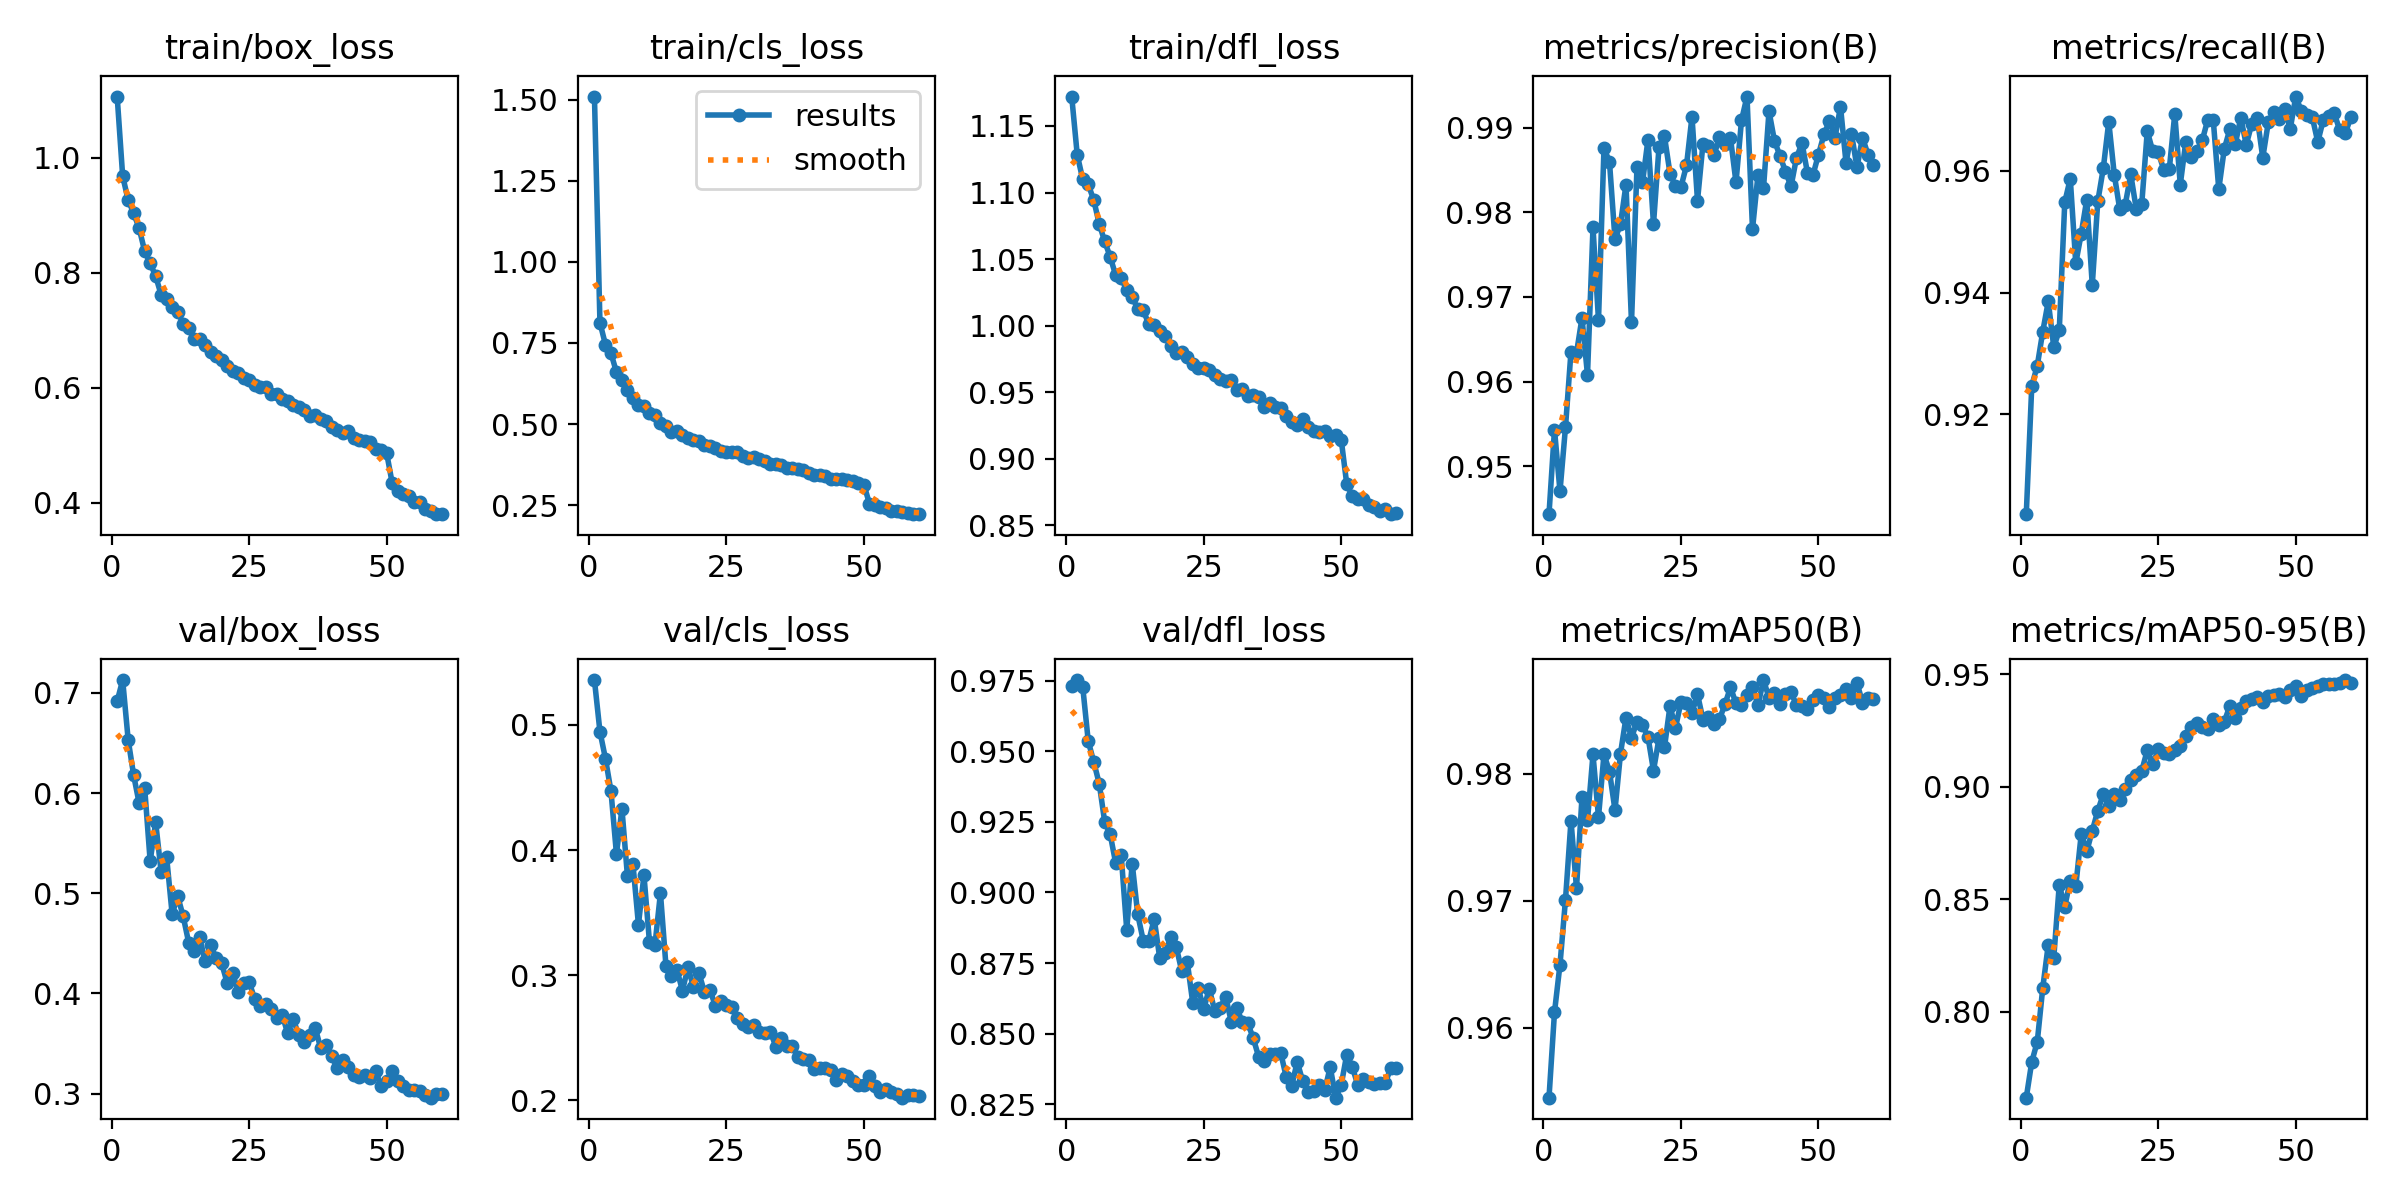

In [ ]:
from IPython.display import Image

# Показывает основные графики
Image(filename='runs/detect/train/results.png')

Saving multicuc.jpg to multicuc (1).jpg


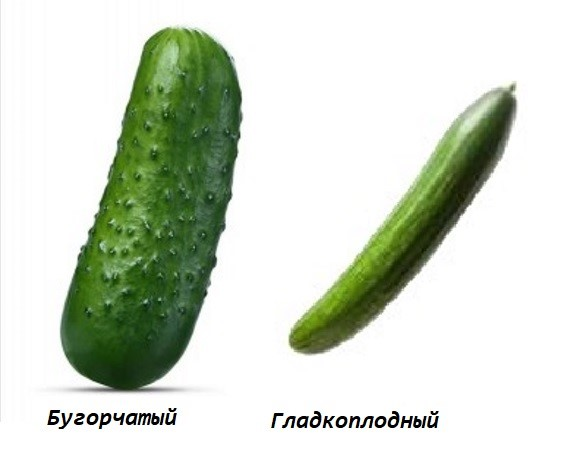

In [ ]:
from google.colab import files
from IPython.display import Image, display
import os

# Загрузите изображение с компьютера
uploaded = files.upload()
test_image = list(uploaded.keys())[0]  # Имя загруженного файла

# Или укажите URL изображения
# !wget -O test_image.jpg "https://example.com/your_image.jpg"
# test_image = "test_image.jpg"

display(Image(filename=test_image))  # Показать загруженное изображение

In [ ]:
from ultralytics import YOLO

# Загрузите обученную модель
model = YOLO('runs/detect/train/weights/best.pt')  # Путь к вашим весам

# Предсказание
results = model.predict(source=test_image,
                       save=True,
                       conf=0.5,  # Порог уверенности
                       imgsz=640)  # Размер изображения

# Показать результат
result_image = f"runs/detect/predict/{os.path.basename(test_image)}"
display(Image(filename=result_image))


image 1/1 /content/multicuc (1).jpg: 512x640 2 cucumbers, 13.8ms
Speed: 2.7ms preprocess, 13.8ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/detect/predict13


FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/predict/multicuc (1).jpg'


image 1/1 /content/ap2.jpg: 448x640 1 apple_Red, 1 apple_green, 13.7ms
Speed: 2.0ms preprocess, 13.7ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict7
Результат сохранен в: runs/detect/predict7/ap2.jpg


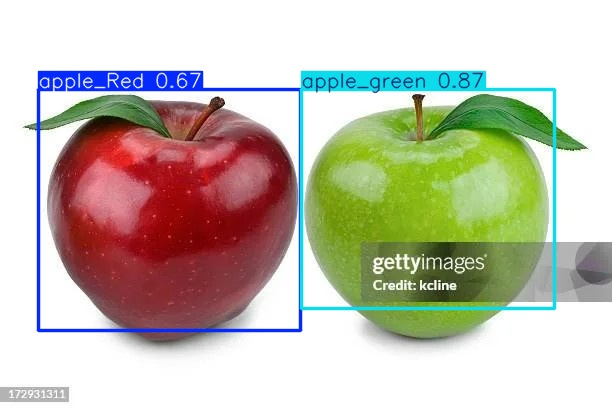

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import Image, display

# 1. Загрузка модели
model = YOLO('runs/detect/train/weights/best.pt')

# 2. Предсказание (с автоматическим сохранением)
results = model.predict(
    source="/content/ap2.jpg",  # Путь к вашему изображению
    save=True,
    conf=0.5,
    imgsz=640
)

# 3. Найдем последний созданный каталог predict
predict_dirs = [d for d in os.listdir("runs/detect") if d.startswith("predict")]
latest_predict = sorted(predict_dirs)[-1]  # Берем последний

# 4. Автоматическое определение имени сохраненного файла
result_files = os.listdir(f"runs/detect/{latest_predict}")
output_image = f"runs/detect/{latest_predict}/{result_files[0]}"

# 5. Отображение результата
print(f"Результат сохранен в: {output_image}")
display(Image(filename=output_image))